In [1]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_excel("delhi_zone_6_branches_Manjis.xlsx")
data

,Branch,Date,TOT_PAY,TOT_RCPT
0,Del_Br_1,2021-01-01,6.490000,25.73000
1,Del_Br_1,2021-01-02,15.390000,30.76000
2,Del_Br_1,2021-01-04,26.160000,56.91000
3,Del_Br_1,2021-01-05,16.010000,25.62000
4,Del_Br_1,2021-01-06,11.420000,22.98000
...,...,...,...,...
2228,Del_Br_6,2022-06-24,16.789000,9.77101
2229,Del_Br_6,2022-06-27,13.983000,13.04400
2230,Del_Br_6,2022-06-28,15.770088,7.05678
2231,Del_Br_6,2022-06-29,14.601000,4.03800


## Branch loop:

In [3]:
df1 = data[data["Branch"] == 'Del_Br_1']
df2 = data[data["Branch"] == 'Del_Br_2']
df3 = data[data["Branch"] == 'Del_Br_3']
df4 = data[data["Branch"] == 'Del_Br_4']
df5 = data[data["Branch"] == 'Del_Br_5']
df6 = data[data["Branch"] == 'Del_Br_6']

In [4]:
df1 = df1.drop("Branch", axis = 1)
df2 = df2.drop("Branch", axis = 1)
df3 = df3.drop("Branch", axis = 1)
df4 = df4.drop("Branch", axis = 1)
df5 = df5.drop("Branch", axis = 1)
df6 = df6.drop("Branch", axis = 1)

In [5]:
df1_d = df1["Date"]
df1_p = df1["TOT_PAY"]
df1_r = df1["TOT_RCPT"]
df1_dp = pd.concat([df1_d, df1_p], axis = 1)
df1_dp.columns = ["ds", "y"]
df1_dr = pd.concat([df1_d, df1_r], axis = 1)
df1_dr.columns = ["ds", "y"]

df2_d = df2["Date"]
df2_d = df2_d.reset_index(drop = True)
df2_p = df2["TOT_PAY"]
df2_p = df2_p.reset_index(drop = True)
df2_r = df2["TOT_RCPT"]
df2_r = df2_r.reset_index(drop = True)
df2_dp = pd.concat([df2_d, df2_p], axis = 1) 
df2_dp.columns = ["ds", "y"]
df2_dr = pd.concat([df2_d, df2_r], axis = 1)
df2_dr.columns = ["ds", "y"]

df3_d = df3["Date"]
df3_d = df3_d.reset_index(drop = True)
df3_p = df3["TOT_PAY"]
df3_p = df3_p.reset_index(drop = True)
df3_r = df3["TOT_RCPT"]
df3_r = df3_r.reset_index(drop = True)
df3_dp = pd.concat([df3_d, df3_p], axis = 1) 
df3_dp.columns = ["ds", "y"]
df3_dr = pd.concat([df3_d, df3_r], axis = 1)
df3_dr.columns = ["ds", "y"]

df4_d = df4["Date"]
df4_d = df4_d.reset_index(drop = True)
df4_p = df4["TOT_PAY"]
df4_p = df4_p.reset_index(drop = True)
df4_r = df4["TOT_RCPT"]
df4_r = df4_r.reset_index(drop = True)
df4_dp = pd.concat([df4_d, df4_p], axis = 1)
df4_dp.columns = ["ds", "y"]
df4_dr = pd.concat([df4_d, df4_r], axis = 1)
df4_dr.columns = ["ds", "y"]

df5_d = df5["Date"]
df5_d = df5_d.reset_index(drop = True)
df5_p = df5["TOT_PAY"]
df5_p = df5_p.reset_index(drop = True)
df5_r = df5["TOT_RCPT"]
df5_r = df5_r.reset_index(drop = True)
df5_dp = pd.concat([df5_d, df5_p], axis = 1) 
df5_dp.columns = ["ds", "y"]
df5_dr = pd.concat([df5_d, df5_r], axis = 1)
df5_dr.columns = ["ds", "y"]

df6_d = df6["Date"]
df6_d = df6_d.reset_index(drop = True)
df6_p = df6["TOT_PAY"]
df6_p = df6_p.reset_index(drop = True)
df6_r = df6["TOT_RCPT"]
df6_r = df6_r.reset_index(drop = True)
df6_dp = pd.concat([df6_d, df6_p], axis = 1) 
df6_dp.columns = ["ds", "y"]
df6_dr = pd.concat([df6_d, df6_r], axis = 1)
df6_dr.columns = ["ds", "y"]

In [6]:
df1_d

0     2021-01-01
1     2021-01-02
2     2021-01-04
3     2021-01-05
4     2021-01-06
         ...    
378   2022-06-24
379   2022-06-27
380   2022-06-28
381   2022-06-29
382   2022-06-30
Name: Date, Length: 383, dtype: datetime64[ns]

#### Train and test (Pay):

In [7]:
df1_dp_tr = df1_dp.loc[(df1_dp['ds'] <= '2022-05-31')]
df1_dp_te = df1_dr.loc[(df1_dr['ds'] > '2022-05-31')]

df2_dp_tr = df2_dp.loc[(df2_dp['ds'] <= '2022-05-31')]
df2_dp_te = df2_dp.loc[(df2_dp['ds'] > '2022-05-31')]

df3_dp_tr = df3_dp.loc[(df3_dp['ds'] <= '2022-05-31')]
df3_dp_te = df3_dp.loc[(df3_dp['ds'] > '2022-05-31')]

df4_dp_tr = df4_dp.loc[(df4_dp['ds'] <= '2022-05-31')]
df4_dp_te = df4_dp.loc[(df4_dp['ds'] > '2022-05-31')]

df5_dp_tr = df5_dp.loc[(df5_dp['ds'] <= '2022-05-31')]
df5_dp_te = df5_dp.loc[(df5_dp['ds'] > '2022-05-31')]

df6_dp_tr = df6_dp.loc[(df6_dp['ds'] <= '2022-05-31')]
df6_dp_te = df6_dp.loc[(df6_dp['ds'] > '2022-05-31')]

#### Train and test (Receipt) :

In [8]:
df1_dr_tr = df1_dr.loc[(df1_dr['ds'] <= '2022-05-31')]
df1_dr_te = df1_dr.loc[(df1_dr['ds'] > '2022-05-31' )]

df2_dr_tr = df2_dr.loc[(df2_dr['ds'] <= '2022-05-31')]
df2_dr_te = df2_dr.loc[(df2_dr['ds'] > '2022-05-31')]

df3_dr_tr = df3_dr.loc[(df3_dr['ds'] <= '2022-05-31')]
df3_dr_te = df3_dr.loc[(df3_dr['ds'] > '2022-05-31')]

df4_dr_tr = df4_dr.loc[(df4_dr['ds'] <= '2022-05-31')]
df4_dr_te = df4_dr.loc[(df4_dr['ds'] > '2022-05-31')]

df5_dr_tr = df5_dr.loc[(df5_dr['ds'] <= '2022-05-31')]
df5_dr_te = df5_dr.loc[(df5_dr['ds'] > '2022-05-31')]

df6_dr_tr = df6_dr.loc[(df6_dr['ds'] <= '2022-05-31')]
df6_dr_te = df6_dr.loc[(df6_dr['ds'] > '2022-05-31')]

## Holiday Function:

In [10]:
def holiday(df):
    global hol
    upper_window = []
    lower_window = [0]
    for i in range(len(df) - 1):
        deltap = df[i+1] - df[i]
        upper_window.append(deltap.days - 1)
    for i in range(len(df)):
        if i != 0:
            deltan = df[i-1] - df[i]
            lower_window.append(deltan.days + 1)
    upper_window.append(0)
    
    h = pd.concat([df, pd.DataFrame(lower_window), pd.DataFrame(upper_window)], axis = 1)
    h.columns = ["ds", "lower_window", "upper_window"]
    
    h2 = h.drop(h[(h['lower_window'] == 0) & (h['upper_window'] == 0)].index)
    h2 = h2.reset_index(drop = True)
    
    ld = list(h2['ds'])
    lw = list(h2['lower_window'])
    lu = list(h2['upper_window'])
    
    holiday = []
    for i in range(len(h2)):
        if((ld[i] == pd.to_datetime('2021-01-25')) | (ld[i] == pd.to_datetime('2021-01-27')) | (ld[i] == pd.to_datetime('2021-04-01')) | 
        (ld[i] == pd.to_datetime('2021-04-03')) | (ld[i] == pd.to_datetime('2021-08-14'))| (ld[i] == pd.to_datetime('2021-08-16')) | 
        (ld[i] == pd.to_datetime('2021-10-01')) | (ld[i] == pd.to_datetime('2021-10-03')) | (ld[i] == pd.to_datetime('2021-12-24')) | 
        (ld[i] == pd.to_datetime('2021-12-26'))):
            holiday.append('national')       

        elif (lw[i] == 0) & (lu[i] == 1):
            holiday.append('hol_wk_sat1')

        elif (lw[i] == -1) & (lu[i] == 0):
            holiday.append('hol_wk_mon1')

        elif (lw[i] == 0) & (lu[i] == 2):
            holiday.append('hol_wk_fri2')

        elif (lw[i] == -2) & (lu[i] == 0):
            holiday.append('hol_wk_mon2')

        else:
            holiday.append('local')
            
    hol = pd.concat([pd.DataFrame(holiday), h2], axis = 1)
    hol.columns = ['holiday', 'ds', 'lower_window', 'upper_window']
    return hol

In [11]:
holiday(df2_d)

,holiday,ds,lower_window,upper_window
0,hol_wk_sat1,2021-01-02,0,1
1,hol_wk_mon1,2021-01-04,-1,0
2,hol_wk_fri2,2021-01-08,0,2
3,hol_wk_mon2,2021-01-11,-2,0
4,hol_wk_sat1,2021-01-16,0,1
...,...,...,...,...
170,hol_wk_mon2,2022-06-13,-2,0
171,hol_wk_sat1,2022-06-18,0,1
172,hol_wk_mon1,2022-06-20,-1,0
173,hol_wk_fri2,2022-06-24,0,2


## Forecasting function:

In [18]:
def forecast(data):
    global forecast
    global fig
    global fig_comp
    m = Prophet(yearly_seasonality = False, weekly_seasonality = True, daily_seasonality = False,
               holidays = hol)
    m.fit(data)
    future = pd.DataFrame({'ds' : df1_dp_tr['ds']})
    forecast1 = m.predict(future)
    fig = m.plot(forecast1)
    fig_comp = m.plot_components(forecast1)
    return forecast1
    return fig
    return fig_comp

## Error and description function:

In [14]:
def details(data1):
    global data_cv
    global data_per
    m = Prophet(yearly_seasonality = False, weekly_seasonality = True, daily_seasonality = False,
               holidays = hol, n_changepoints = 18)
    m.fit(data1)
    future = pd.DataFrame({'ds' : df4_dp_tr['ds']})
    forecast = m.predict(future)
    data_cv = cross_validation(m, horizon = '31 days')
    data_per = performance_metrics(data_cv)
    rmse = data_per['rmse'].mean()
    mape = data_per['mape'].mean()
    avg_pred = forecast['yhat'].mean()
    stdev = forecast['yhat'].std()
    minimum = forecast['yhat'].min()
    maximum = forecast['yhat'].max()
    df = pd.DataFrame([rmse, avg, stdev, minimum, maximum])
    df = df.T
    df.columns = ['rmse', 'avg', 'stdev', 'min', 'max']
    return df

### Branch 1 :

#### Pay (Train):

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,12.013625,1.051536,23.483065,12.013625,12.013625,0.041241,0.041241,0.041241,0.000000,...,0.0,0.0,0.0,0.041241,0.041241,0.041241,0.0,0.0,0.0,12.054866
1,2021-01-02,12.046526,2.763043,25.617892,12.046526,12.046526,1.956401,1.956401,1.956401,0.000000,...,0.0,0.0,0.0,-0.743133,-0.743133,-0.743133,0.0,0.0,0.0,14.002927
2,2021-01-04,12.112329,3.610205,27.623785,12.112329,12.112329,3.191756,3.191756,3.191756,0.000000,...,0.0,0.0,0.0,3.488651,3.488651,3.488651,0.0,0.0,0.0,15.304084
3,2021-01-05,12.145230,2.156605,25.022233,12.145230,12.145230,1.715847,1.715847,1.715847,0.000000,...,0.0,0.0,0.0,1.715847,1.715847,1.715847,0.0,0.0,0.0,13.861077
4,2021-01-06,12.178131,-0.514574,22.165067,12.178131,12.178131,-1.378934,-1.378934,-1.378934,0.000000,...,0.0,0.0,0.0,-1.378934,-1.378934,-1.378934,0.0,0.0,0.0,10.799197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-05-25,16.228493,2.432807,26.952769,16.228493,16.228493,-1.378934,-1.378934,-1.378934,0.000000,...,0.0,0.0,0.0,-1.378934,-1.378934,-1.378934,0.0,0.0,0.0,14.849559
355,2022-05-26,16.220887,3.384923,27.242772,16.220887,16.220887,-0.356623,-0.356623,-0.356623,0.000000,...,0.0,0.0,0.0,-0.356623,-0.356623,-0.356623,0.0,0.0,0.0,15.864263
356,2022-05-27,16.213280,4.093467,29.836003,16.213280,16.213280,0.551732,0.551732,0.551732,0.510492,...,0.0,0.0,0.0,0.041241,0.041241,0.041241,0.0,0.0,0.0,16.765012
357,2022-05-30,16.190459,10.143623,34.000707,16.190459,16.190459,5.362809,5.362809,5.362809,0.000000,...,0.0,0.0,0.0,3.488651,3.488651,3.488651,0.0,0.0,0.0,21.553269


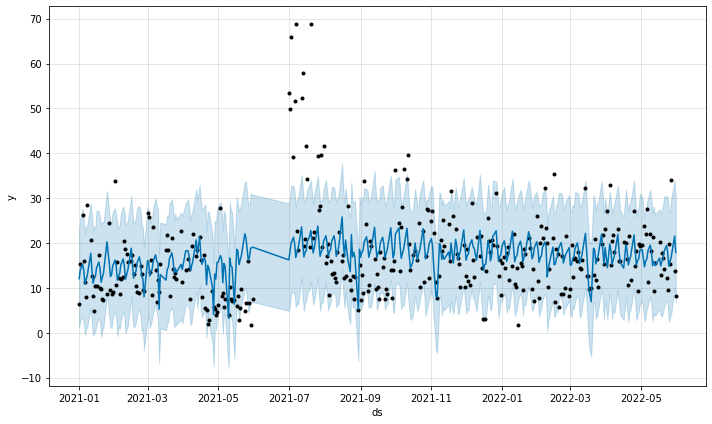

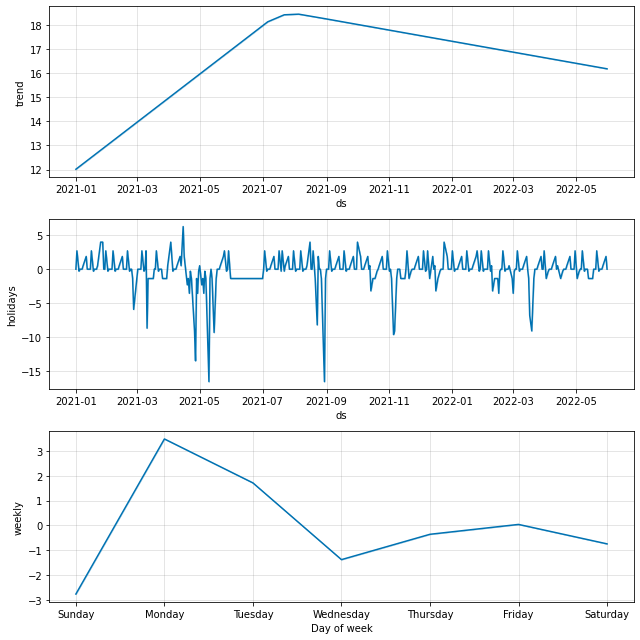

In [19]:
forecast(df1_dp_tr)

In [139]:
br1_p = details(df1_dp_tr)
br1_p

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,13.437998,0.73365,16.961764,2.623119,11.336299,24.782959


INFO:prophet:n_changepoints greater than number of observations. Using 18.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-01,26.298284,34.592719,53.383320,26.298284,26.298284,17.776092,17.776092,17.776092,0.000000,...,0.0,0.0,0.0,17.776092,17.776092,17.776092,0.0,0.0,0.0,44.074376
1,2022-06-02,25.962191,23.989679,41.457625,25.962191,25.962191,6.657171,6.657171,6.657171,0.000000,...,0.0,0.0,0.0,6.657171,6.657171,6.657171,0.0,0.0,0.0,32.619362
2,2022-06-03,25.626097,17.980680,36.416857,25.626097,25.626097,1.227459,1.227459,1.227459,0.000000,...,0.0,0.0,0.0,1.227459,1.227459,1.227459,0.0,0.0,0.0,26.853556
3,2022-06-04,25.290004,20.322118,39.320945,25.290004,25.290004,4.551209,4.551209,4.551209,0.000000,...,0.0,0.0,0.0,-8.160925,-8.160925,-8.160925,0.0,0.0,0.0,29.841213
4,2022-06-06,24.617817,37.905465,56.019286,24.617817,24.617817,22.259714,22.259714,22.259714,0.000000,...,0.0,0.0,0.0,24.355643,24.355643,24.355643,0.0,0.0,0.0,46.877530
5,2022-06-07,24.281723,25.438846,44.449555,24.281723,24.281723,10.797960,10.797960,10.797960,0.000000,...,0.0,0.0,0.0,10.797960,10.797960,10.797960,0.0,0.0,0.0,35.079683
6,2022-06-08,23.945630,32.225409,50.503093,23.945630,23.945630,17.776092,17.776092,17.776092,0.000000,...,0.0,0.0,0.0,17.776092,17.776092,17.776092,0.0,0.0,0.0,41.721722
7,2022-06-09,23.609536,21.143905,39.843497,23.609536,23.609536,6.657171,6.657171,6.657171,0.000000,...,0.0,0.0,0.0,6.657171,6.657171,6.657171,0.0,0.0,0.0,30.266708
8,2022-06-10,23.273443,26.265498,44.052722,23.273443,23.273443,11.855720,11.855720,11.855720,10.628261,...,0.0,0.0,0.0,1.227459,1.227459,1.227459,0.0,0.0,0.0,35.129163
9,2022-06-13,22.265163,61.088916,80.117859,22.265163,22.265163,48.454154,48.454154,48.454154,0.000000,...,0.0,0.0,0.0,24.355643,24.355643,24.355643,0.0,0.0,0.0,70.719316


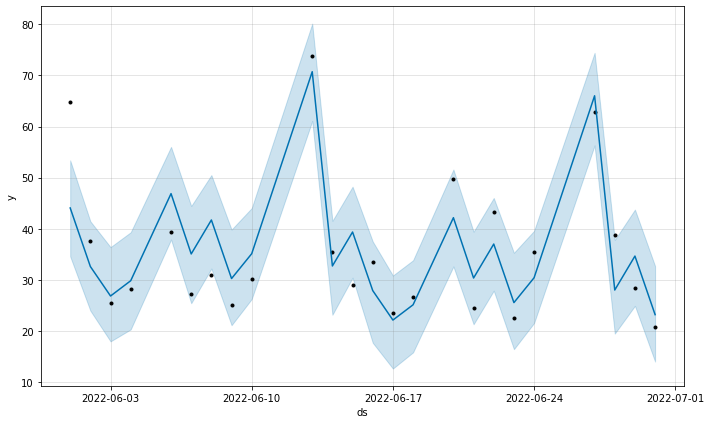

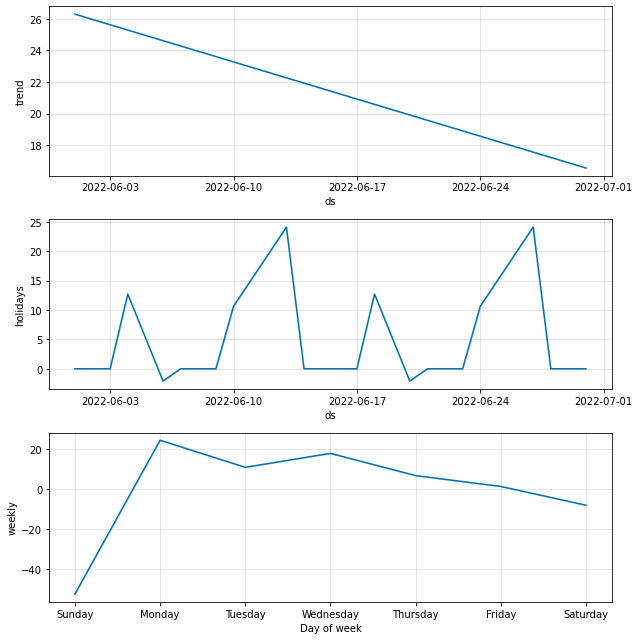

In [94]:
forecast(df1_dp_te)

In [104]:
details(df1_dp_te)

INFO:prophet:Making 4 forecasts with cutoffs between 2022-06-17 12:00:00 and 2022-06-25 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 15.


,rmse,mape,avg,stdev,min,max
0,8.506348,0.2283,35.747227,12.024829,22.148249,70.719316


#### Receipt:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,22.517502,0.705408,38.352169,22.517502,22.517502,-2.275470,-2.275470,-2.275470,0.000000,...,0.0,0.0,0.0,-2.275470,-2.275470,-2.275470,0.0,0.0,0.0,20.242032
1,2021-01-02,22.632294,2.651285,42.229324,22.632294,22.632294,-0.836536,-0.836536,-0.836536,0.000000,...,0.0,0.0,0.0,-1.451663,-1.451663,-1.451663,0.0,0.0,0.0,21.795757
2,2021-01-04,22.861876,23.250117,65.077678,22.861876,22.861876,20.632245,20.632245,20.632245,0.000000,...,0.0,0.0,0.0,-1.157798,-1.157798,-1.157798,0.0,0.0,0.0,43.494121
3,2021-01-05,22.976667,5.292233,46.155817,22.976667,22.976667,3.072362,3.072362,3.072362,0.000000,...,0.0,0.0,0.0,3.072362,3.072362,3.072362,0.0,0.0,0.0,26.049029
4,2021-01-06,23.091458,5.817850,45.265129,23.091458,23.091458,1.893935,1.893935,1.893935,0.000000,...,0.0,0.0,0.0,1.893935,1.893935,1.893935,0.0,0.0,0.0,24.985394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-05-25,29.247185,11.062857,53.378738,29.247185,29.247185,1.893935,1.893935,1.893935,0.000000,...,0.0,0.0,0.0,1.893935,1.893935,1.893935,0.0,0.0,0.0,31.141120
355,2022-05-26,29.269980,7.820499,49.501002,29.269980,29.269980,-1.667759,-1.667759,-1.667759,0.000000,...,0.0,0.0,0.0,-1.667759,-1.667759,-1.667759,0.0,0.0,0.0,27.602222
356,2022-05-27,29.292776,9.304239,48.451270,29.292776,29.292776,0.275196,0.275196,0.275196,2.550666,...,0.0,0.0,0.0,-2.275470,-2.275470,-2.275470,0.0,0.0,0.0,29.567972
357,2022-05-30,29.361162,45.268774,85.518942,29.361162,29.361162,36.132920,36.132920,36.132920,0.000000,...,0.0,0.0,0.0,-1.157798,-1.157798,-1.157798,0.0,0.0,0.0,65.494082


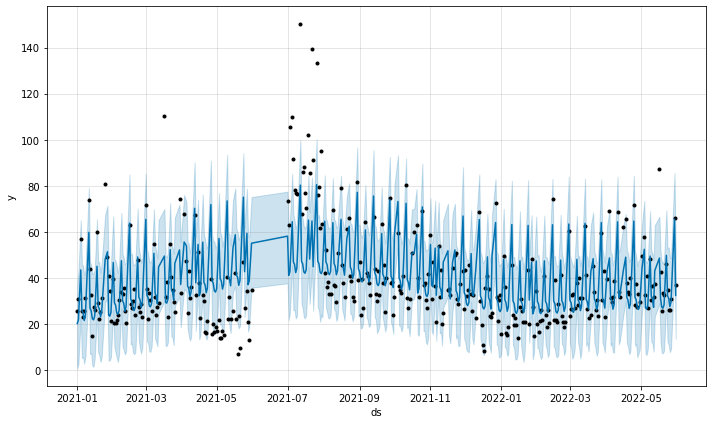

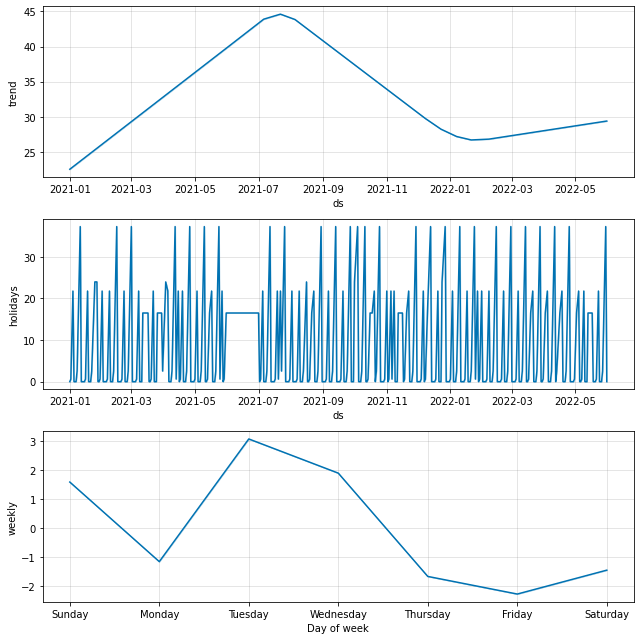

In [142]:
forecast(df1_dr_tr)

In [143]:
br1_r = details(df1_dr_tr)
br1_r

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,27.383273,0.517635,39.074117,12.939488,20.238088,80.697465


### Branch 2 :

#### Pay:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,28.277621,9.662684,53.554939,28.277621,28.277621,3.262992,3.262992,3.262992,0.000000,...,0.0,0.0,0.0,3.262992,3.262992,3.262992,0.0,0.0,0.0,31.540613
1,2021-01-02,28.307826,14.997946,54.653721,28.307826,28.307826,5.412464,5.412464,5.412464,0.000000,...,0.0,0.0,0.0,-3.031508,-3.031508,-3.031508,0.0,0.0,0.0,33.720290
2,2021-01-04,28.368235,13.969105,56.940117,28.368235,28.368235,6.968565,6.968565,6.968565,0.000000,...,0.0,0.0,0.0,-9.588005,-9.588005,-9.588005,0.0,0.0,0.0,35.336801
3,2021-01-05,28.398440,8.159776,51.966643,28.398440,28.398440,2.894355,2.894355,2.894355,0.000000,...,0.0,0.0,0.0,2.894355,2.894355,2.894355,0.0,0.0,0.0,31.292795
4,2021-01-06,28.428645,9.504976,50.643821,28.428645,28.428645,2.280587,2.280587,2.280587,0.000000,...,0.0,0.0,0.0,2.280587,2.280587,2.280587,0.0,0.0,0.0,30.709232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2022-05-25,28.084152,8.399229,52.286532,28.084152,28.084152,2.280587,2.280587,2.280587,0.000000,...,0.0,0.0,0.0,2.280587,2.280587,2.280587,0.0,0.0,0.0,30.364739
330,2022-05-26,28.063613,9.820502,52.423716,28.063613,28.063613,1.751725,1.751725,1.751725,0.000000,...,0.0,0.0,0.0,1.751725,1.751725,1.751725,0.0,0.0,0.0,29.815338
331,2022-05-27,28.043074,18.153203,61.095625,28.043074,28.043074,11.192403,11.192403,11.192403,7.929412,...,0.0,0.0,0.0,3.262992,3.262992,3.262992,0.0,0.0,0.0,39.235477
332,2022-05-30,27.981457,20.243408,63.956164,27.981457,27.981457,13.039003,13.039003,13.039003,0.000000,...,0.0,0.0,0.0,-9.588005,-9.588005,-9.588005,0.0,0.0,0.0,41.020460


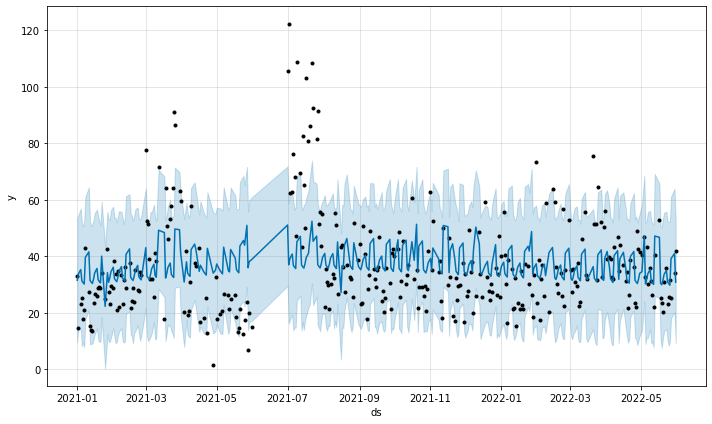

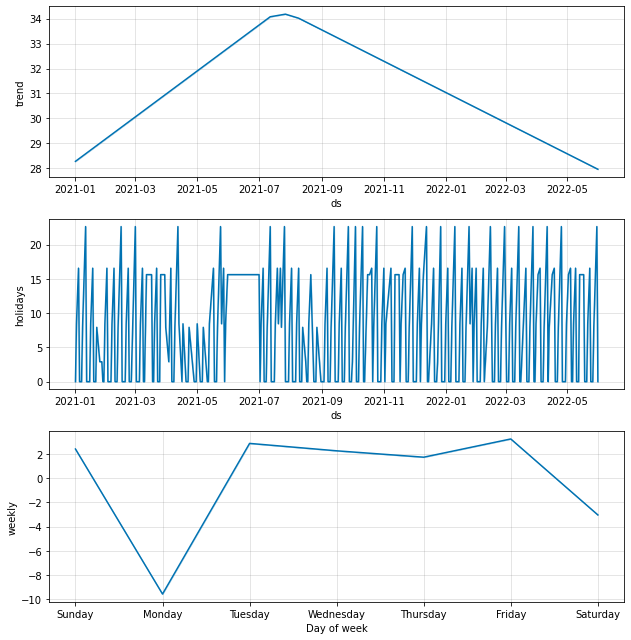

In [146]:
forecast(df2_dp_tr)

In [147]:
br2_p = details(df2_dp_tr)
br2_p

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,26.326979,0.681055,36.776613,5.170344,22.531841,53.31358


#### Receipt:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,51.160496,18.181170,76.615371,51.160496,51.160496,-4.170877,-4.170877,-4.170877,0.000000,...,0.0,0.0,0.0,-4.170877,-4.170877,-4.170877,0.0,0.0,0.0,46.989619
1,2021-01-02,51.220940,18.474273,72.979072,51.220940,51.220940,-6.842925,-6.842925,-6.842925,0.000000,...,0.0,0.0,0.0,1.081031,1.081031,1.081031,0.0,0.0,0.0,44.378015
2,2021-01-04,51.341828,50.391495,107.587324,51.341828,51.341828,27.695029,27.695029,27.695029,0.000000,...,0.0,0.0,0.0,-1.366150,-1.366150,-1.366150,0.0,0.0,0.0,79.036857
3,2021-01-05,51.402271,29.126340,85.545196,51.402271,51.402271,6.110636,6.110636,6.110636,0.000000,...,0.0,0.0,0.0,6.110636,6.110636,6.110636,0.0,0.0,0.0,57.512908
4,2021-01-06,51.462715,23.754421,80.463002,51.462715,51.462715,1.265552,1.265552,1.265552,0.000000,...,0.0,0.0,0.0,1.265552,1.265552,1.265552,0.0,0.0,0.0,52.728267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2022-05-25,42.002297,15.318191,73.710791,42.002297,42.002297,1.265552,1.265552,1.265552,0.000000,...,0.0,0.0,0.0,1.265552,1.265552,1.265552,0.0,0.0,0.0,43.267849
330,2022-05-26,41.934327,16.265150,74.298679,41.934327,41.934327,2.925339,2.925339,2.925339,0.000000,...,0.0,0.0,0.0,2.925339,2.925339,2.925339,0.0,0.0,0.0,44.859666
331,2022-05-27,41.866356,14.079028,72.641913,41.866356,41.866356,0.762412,0.762412,0.762412,4.933289,...,0.0,0.0,0.0,-4.170877,-4.170877,-4.170877,0.0,0.0,0.0,42.628768
332,2022-05-30,41.662444,67.692399,122.533806,41.662444,41.662444,52.701663,52.701663,52.701663,0.000000,...,0.0,0.0,0.0,-1.366150,-1.366150,-1.366150,0.0,0.0,0.0,94.364107


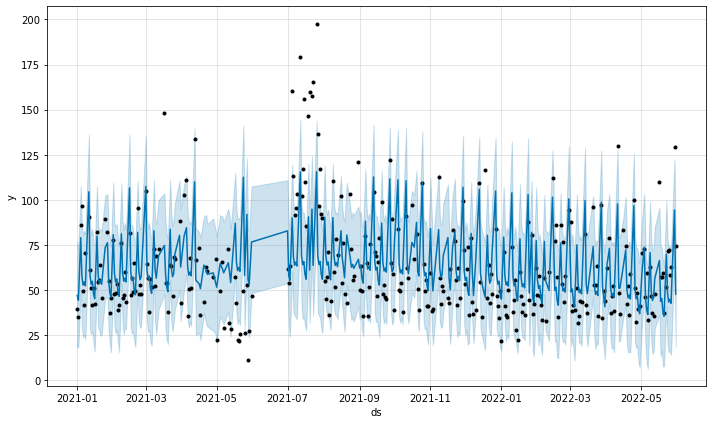

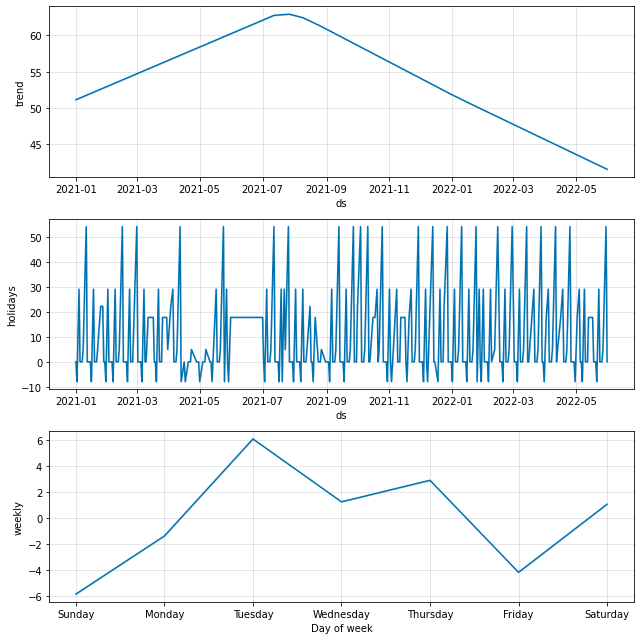

In [150]:
forecast(df2_dr_tr)

In [151]:
br2_r = details(df2_dr_tr)
br2_r

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,35.286673,0.421286,62.701362,16.561016,35.365849,115.539101


### Branch 3 :

#### Pay:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,27.649606,15.887621,46.528629,27.649606,27.649606,3.299187,3.299187,3.299187,0.000000,...,0.0,0.0,0.0,3.299187,3.299187,3.299187,0.0,0.0,0.0,30.948793
1,2021-01-02,27.695005,17.454411,49.582149,27.695005,27.695005,5.684131,5.684131,5.684131,0.000000,...,0.0,0.0,0.0,-0.970185,-0.970185,-0.970185,0.0,0.0,0.0,33.379135
2,2021-01-04,27.785802,17.430201,48.587408,27.785802,27.785802,4.403444,4.403444,4.403444,0.000000,...,0.0,0.0,0.0,-3.031638,-3.031638,-3.031638,0.0,0.0,0.0,32.189246
3,2021-01-05,27.831201,12.766375,44.294692,27.831201,27.831201,0.769250,0.769250,0.769250,0.000000,...,0.0,0.0,0.0,0.769250,0.769250,0.769250,0.0,0.0,0.0,28.600451
4,2021-01-06,27.876600,10.854284,42.365030,27.876600,27.876600,-0.638831,-0.638831,-0.638831,0.000000,...,0.0,0.0,0.0,-0.638831,-0.638831,-0.638831,0.0,0.0,0.0,27.237769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022-05-25,33.262165,16.772088,48.677973,33.262165,33.262165,-0.638831,-0.638831,-0.638831,0.000000,...,0.0,0.0,0.0,-0.638831,-0.638831,-0.638831,0.0,0.0,0.0,32.623335
353,2022-05-26,33.250792,16.679608,47.525093,33.250792,33.250792,-0.457334,-0.457334,-0.457334,0.000000,...,0.0,0.0,0.0,-0.457334,-0.457334,-0.457334,0.0,0.0,0.0,32.793458
354,2022-05-27,33.239418,30.311735,62.359263,33.239418,33.239418,13.363610,13.363610,13.363610,10.064423,...,0.0,0.0,0.0,3.299187,3.299187,3.299187,0.0,0.0,0.0,46.603028
355,2022-05-30,33.205297,19.734331,51.330869,33.205297,33.205297,3.291605,3.291605,3.291605,0.000000,...,0.0,0.0,0.0,-3.031638,-3.031638,-3.031638,0.0,0.0,0.0,36.496901


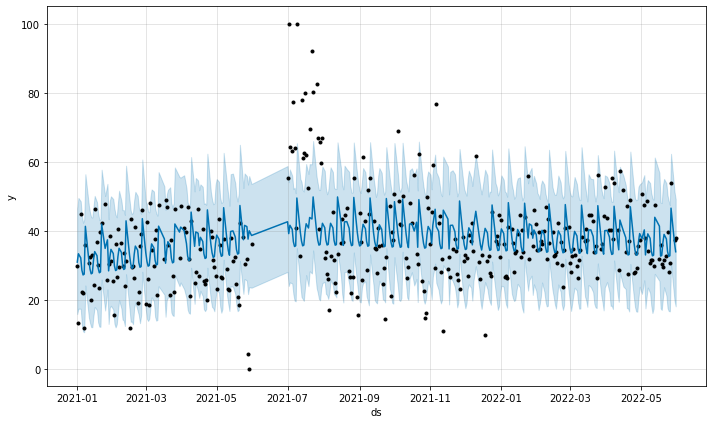

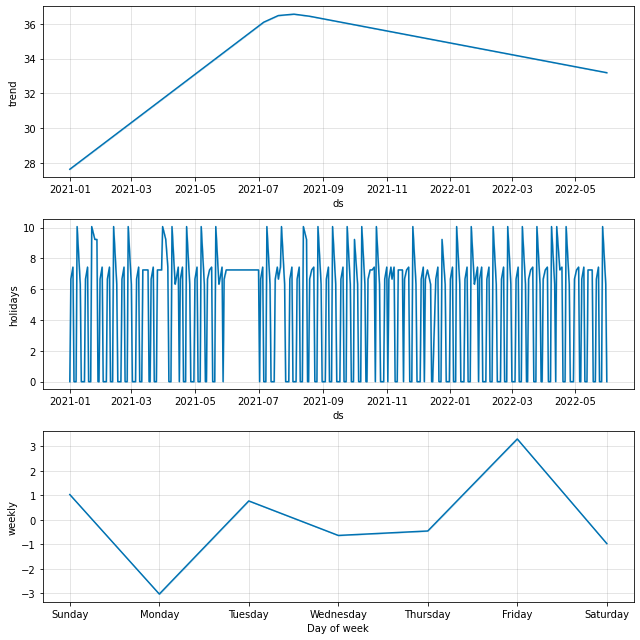

In [154]:
forecast(df3_dp_tr)

In [155]:
br3_p = details(df3_dp_tr)
br3_p

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,17.437551,1.622904,37.043714,4.825155,26.917197,50.209786


#### Receipt:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,41.429768,18.824783,55.947990,41.429768,41.429768,-4.608103,-4.608103,-4.608103,0.00000,...,0.0,0.0,0.0,-4.608103,-4.608103,-4.608103,0.0,0.0,0.0,36.821665
1,2021-01-02,41.513148,24.708629,61.228249,41.513148,41.513148,2.524641,2.524641,2.524641,0.00000,...,0.0,0.0,0.0,7.663746,7.663746,7.663746,0.0,0.0,0.0,44.037789
2,2021-01-04,41.679910,46.944450,83.824383,41.679910,41.679910,23.421379,23.421379,23.421379,0.00000,...,0.0,0.0,0.0,-3.872451,-3.872451,-3.872451,0.0,0.0,0.0,65.101289
3,2021-01-05,41.763291,25.047513,61.234257,41.763291,41.763291,1.130625,1.130625,1.130625,0.00000,...,0.0,0.0,0.0,1.130625,1.130625,1.130625,0.0,0.0,0.0,42.893916
4,2021-01-06,41.846671,22.640900,59.016120,41.846671,41.846671,-1.620765,-1.620765,-1.620765,0.00000,...,0.0,0.0,0.0,-1.620765,-1.620765,-1.620765,0.0,0.0,0.0,40.225906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022-05-25,44.090740,25.128642,61.876549,44.090740,44.090740,-1.620765,-1.620765,-1.620765,0.00000,...,0.0,0.0,0.0,-1.620765,-1.620765,-1.620765,0.0,0.0,0.0,42.469975
353,2022-05-26,44.070907,26.527134,64.053784,44.070907,44.070907,0.353703,0.353703,0.353703,0.00000,...,0.0,0.0,0.0,0.353703,0.353703,0.353703,0.0,0.0,0.0,44.424610
354,2022-05-27,44.051073,21.901151,60.355564,44.051073,44.051073,-4.224272,-4.224272,-4.224272,0.38383,...,0.0,0.0,0.0,-4.608103,-4.608103,-4.608103,0.0,0.0,0.0,39.826801
355,2022-05-30,43.991573,64.654369,102.150248,43.991573,43.991573,39.629787,39.629787,39.629787,0.00000,...,0.0,0.0,0.0,-3.872451,-3.872451,-3.872451,0.0,0.0,0.0,83.621360


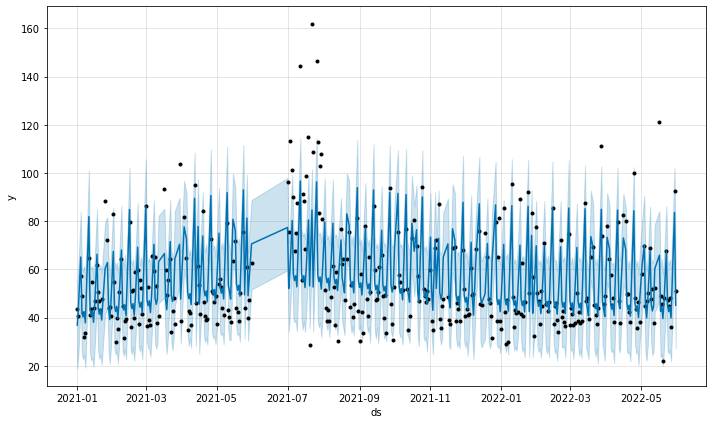

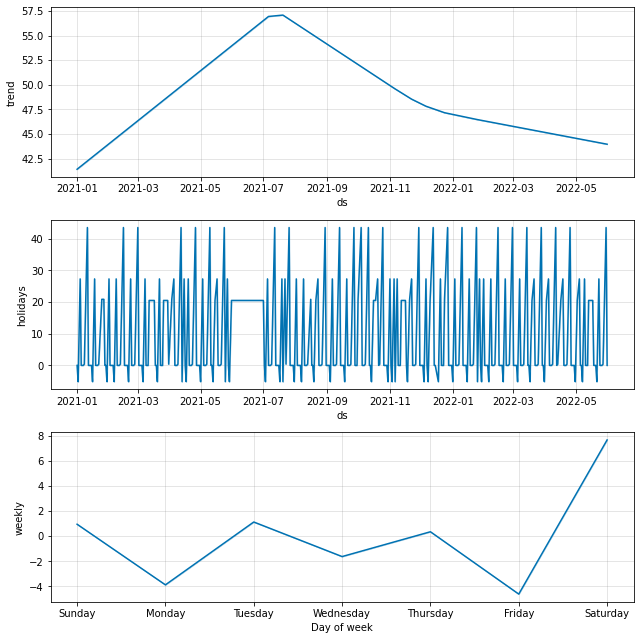

In [158]:
forecast(df3_dr_tr)

In [159]:
br3_r = details(df3_dr_tr)
br3_r

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,20.850372,0.262106,55.302747,14.099429,37.309162,95.586419


### Branch 4 :

#### Pay:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,58.646996,38.318145,96.052207,58.646996,58.646996,8.019823,8.019823,8.019823,0.00000,...,0.0,0.0,0.0,8.019823,8.019823,8.019823,0.0,0.0,0.0,66.666819
1,2021-01-02,58.671192,31.296873,91.858526,58.671192,58.671192,2.529277,2.529277,2.529277,0.00000,...,0.0,0.0,0.0,0.558629,0.558629,0.558629,0.0,0.0,0.0,61.200469
2,2021-01-04,58.719584,38.090158,101.456340,58.719584,58.719584,10.509743,10.509743,10.509743,0.00000,...,0.0,0.0,0.0,2.055344,2.055344,2.055344,0.0,0.0,0.0,69.229327
3,2021-01-05,58.743779,35.424718,95.896406,58.743779,58.743779,6.274609,6.274609,6.274609,0.00000,...,0.0,0.0,0.0,6.274609,6.274609,6.274609,0.0,0.0,0.0,65.018388
4,2021-01-06,58.767975,33.898352,95.419009,58.767975,58.767975,5.044917,5.044917,5.044917,0.00000,...,0.0,0.0,0.0,5.044917,5.044917,5.044917,0.0,0.0,0.0,63.812892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2022-05-25,41.359062,18.917403,75.900981,41.359062,41.359062,5.044917,5.044917,5.044917,0.00000,...,0.0,0.0,0.0,5.044917,5.044917,5.044917,0.0,0.0,0.0,46.403978
337,2022-05-26,41.286761,12.866900,74.128037,41.286761,41.286761,2.117301,2.117301,2.117301,0.00000,...,0.0,0.0,0.0,2.117301,2.117301,2.117301,0.0,0.0,0.0,43.404062
338,2022-05-27,41.214460,20.603120,80.242293,41.214460,41.214460,9.887842,9.887842,9.887842,1.86802,...,0.0,0.0,0.0,8.019823,8.019823,8.019823,0.0,0.0,0.0,51.102302
339,2022-05-30,40.997557,27.132579,88.248459,40.997557,40.997557,16.881940,16.881940,16.881940,0.00000,...,0.0,0.0,0.0,2.055344,2.055344,2.055344,0.0,0.0,0.0,57.879497


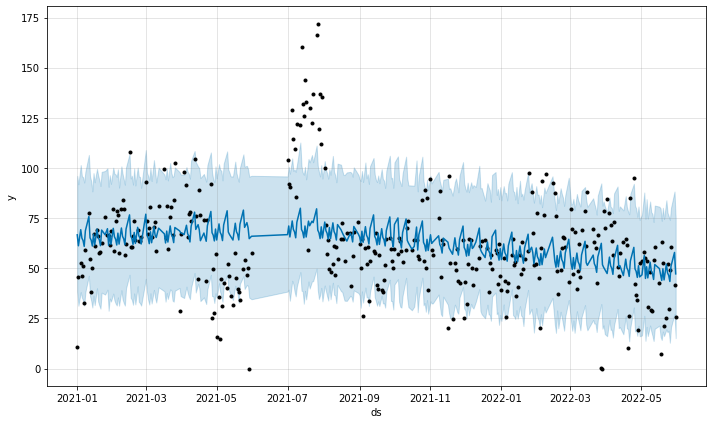

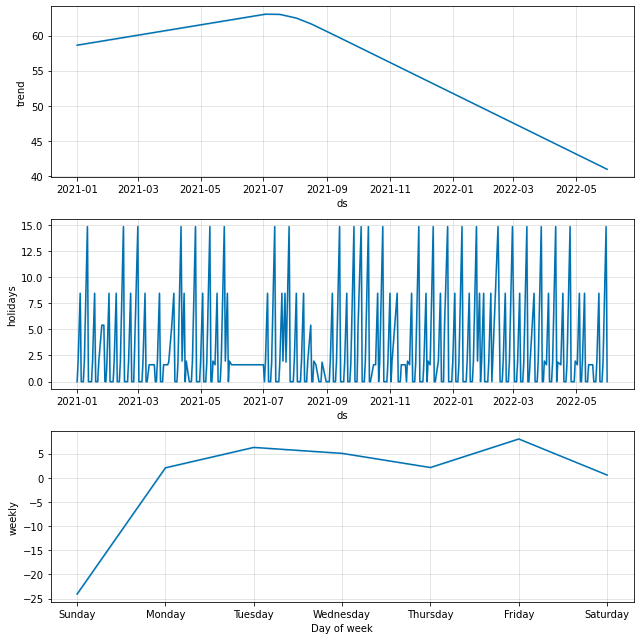

In [189]:
forecast(df4_dp_tr)

In [190]:
br4_p = details(df4_dp_tr)
br4_p

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

INFO:prophet:Skipping MAPE because y close to 0


,rmse,avg,stdev,min,max
0,37.267771,62.240342,7.81507,43.570209,79.584118


#### Receipt:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,46.970789,19.042401,72.138181,46.970789,46.970789,-0.098011,-0.098011,-0.098011,0.000000,...,0.0,0.0,0.0,-0.098011,-0.098011,-0.098011,0.0,0.0,0.0,46.872777
1,2021-01-02,47.023967,20.314016,76.199237,47.023967,47.023967,2.397586,2.397586,2.397586,0.000000,...,0.0,0.0,0.0,5.020148,5.020148,5.020148,0.0,0.0,0.0,49.421553
2,2021-01-04,47.130323,35.168814,91.230696,47.130323,47.130323,15.454531,15.454531,15.454531,0.000000,...,0.0,0.0,0.0,-3.374373,-3.374373,-3.374373,0.0,0.0,0.0,62.584855
3,2021-01-05,47.183502,23.336046,78.025374,47.183502,47.183502,2.902223,2.902223,2.902223,0.000000,...,0.0,0.0,0.0,2.902223,2.902223,2.902223,0.0,0.0,0.0,50.085725
4,2021-01-06,47.236680,21.687687,75.632630,47.236680,47.236680,2.142877,2.142877,2.142877,0.000000,...,0.0,0.0,0.0,2.142877,2.142877,2.142877,0.0,0.0,0.0,49.379556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2022-05-25,39.370711,15.209806,68.715212,39.370711,39.370711,2.142877,2.142877,2.142877,0.000000,...,0.0,0.0,0.0,2.142877,2.142877,2.142877,0.0,0.0,0.0,41.513588
337,2022-05-26,39.349177,14.826883,71.257749,39.349177,39.349177,3.325895,3.325895,3.325895,0.000000,...,0.0,0.0,0.0,3.325895,3.325895,3.325895,0.0,0.0,0.0,42.675072
338,2022-05-27,39.327642,14.819811,71.651022,39.327642,39.327642,3.242067,3.242067,3.242067,3.340078,...,0.0,0.0,0.0,-0.098011,-0.098011,-0.098011,0.0,0.0,0.0,42.569709
339,2022-05-30,39.263038,43.814164,99.101060,39.263038,39.263038,31.091667,31.091667,31.091667,0.000000,...,0.0,0.0,0.0,-3.374373,-3.374373,-3.374373,0.0,0.0,0.0,70.354706


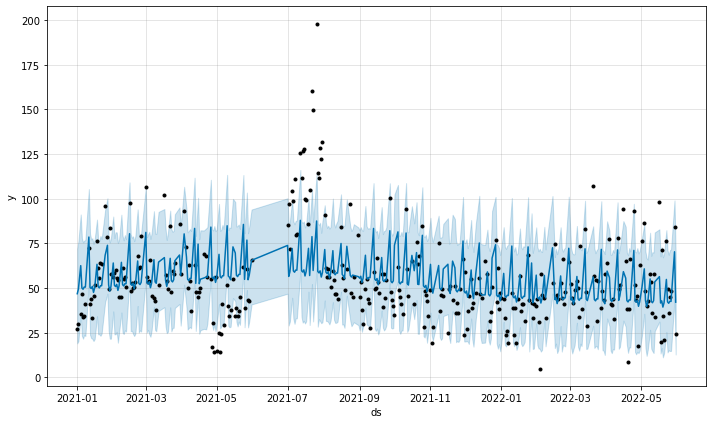

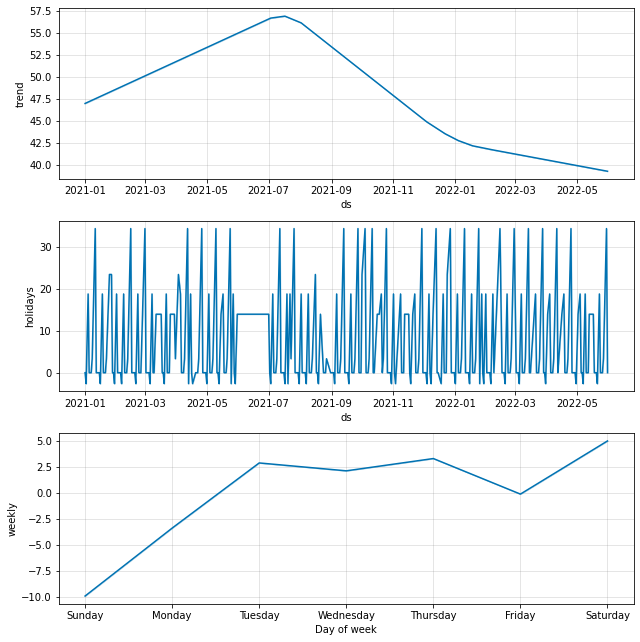

In [166]:
forecast(df4_dr_tr)

In [167]:
br4_r = details(df4_dr_tr)
br4_r

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,34.52995,0.54035,54.99756,10.659444,39.738205,89.075688


### Branch 5 :

#### Pay:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,30.999715,12.017010,50.689955,30.999715,30.999715,0.955636,0.955636,0.955636,0.000000,...,0.0,0.0,0.0,0.955636,0.955636,0.955636,0.0,0.0,0.0,31.955351
1,2021-01-02,31.020324,14.093359,52.902205,31.020324,31.020324,2.986727,2.986727,2.986727,0.000000,...,0.0,0.0,0.0,4.903554,4.903554,4.903554,0.0,0.0,0.0,34.007051
2,2021-01-04,31.061543,15.017411,54.427458,31.061543,31.061543,3.841428,3.841428,3.841428,0.000000,...,0.0,0.0,0.0,3.095668,3.095668,3.095668,0.0,0.0,0.0,34.902972
3,2021-01-05,31.082153,5.560177,44.679434,31.082153,31.082153,-5.056591,-5.056591,-5.056591,0.000000,...,0.0,0.0,0.0,-5.056591,-5.056591,-5.056591,0.0,0.0,0.0,26.025561
4,2021-01-06,31.102762,13.475511,53.431458,31.102762,31.102762,1.591064,1.591064,1.591064,0.000000,...,0.0,0.0,0.0,1.591064,1.591064,1.591064,0.0,0.0,0.0,32.693826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2022-05-25,41.490102,22.465099,62.971345,41.490102,41.490102,1.591064,1.591064,1.591064,0.000000,...,0.0,0.0,0.0,1.591064,1.591064,1.591064,0.0,0.0,0.0,43.081166
337,2022-05-26,41.510712,16.576700,56.409758,41.510712,41.510712,-5.148008,-5.148008,-5.148008,0.000000,...,0.0,0.0,0.0,-5.148008,-5.148008,-5.148008,0.0,0.0,0.0,36.362704
338,2022-05-27,41.531322,32.742191,73.103217,41.531322,41.531322,11.773976,11.773976,11.773976,10.818341,...,0.0,0.0,0.0,0.955636,0.955636,0.955636,0.0,0.0,0.0,53.305299
339,2022-05-30,41.593152,30.732356,68.259990,41.593152,41.593152,8.940898,8.940898,8.940898,0.000000,...,0.0,0.0,0.0,3.095668,3.095668,3.095668,0.0,0.0,0.0,50.534050


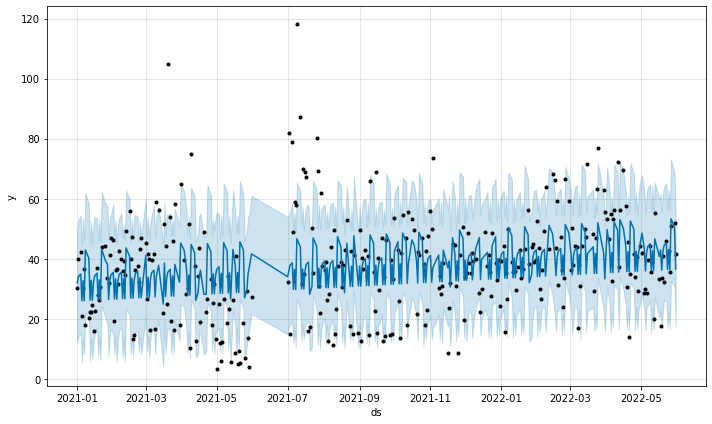

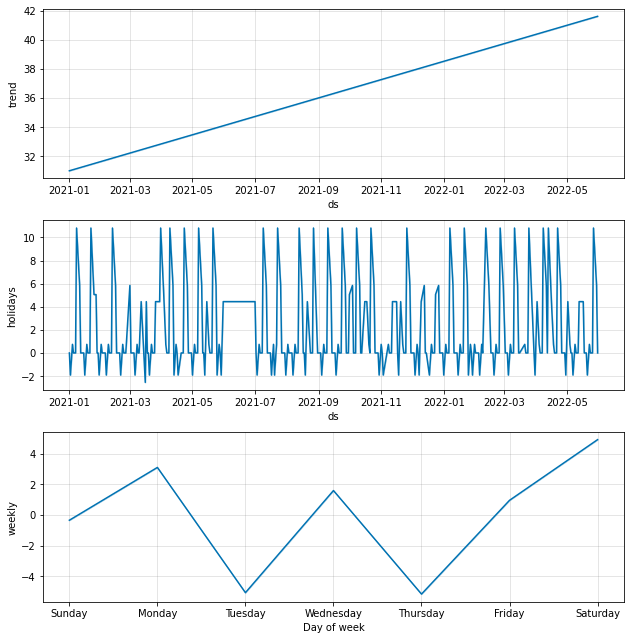

In [170]:
forecast(df5_dp_tr)

In [171]:
br5_p = details(df5_dp_tr)
br5_p

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,19.464216,0.652699,37.482401,6.501007,24.643497,53.436171


#### Receipt:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,27.560508,6.647204,45.409156,27.560508,27.560508,-1.297771,-1.297771,-1.297771,0.000000,...,0.0,0.0,0.0,-1.297771,-1.297771,-1.297771,0.0,0.0,0.0,26.262737
1,2021-01-02,27.584976,6.822137,47.553527,27.584976,27.584976,0.759356,0.759356,0.759356,0.000000,...,0.0,0.0,0.0,7.687020,7.687020,7.687020,0.0,0.0,0.0,28.344332
2,2021-01-04,27.633911,16.228677,55.149174,27.633911,27.633911,7.794266,7.794266,7.794266,0.000000,...,0.0,0.0,0.0,-6.304754,-6.304754,-6.304754,0.0,0.0,0.0,35.428177
3,2021-01-05,27.658379,6.592845,47.529555,27.658379,27.658379,-0.135660,-0.135660,-0.135660,0.000000,...,0.0,0.0,0.0,-0.135660,-0.135660,-0.135660,0.0,0.0,0.0,27.522719
4,2021-01-06,27.682847,7.654984,47.823782,27.682847,27.682847,0.453792,0.453792,0.453792,0.000000,...,0.0,0.0,0.0,0.453792,0.453792,0.453792,0.0,0.0,0.0,28.136639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2022-05-25,42.292886,23.170783,62.483228,42.292886,42.292886,0.453792,0.453792,0.453792,0.000000,...,0.0,0.0,0.0,0.453792,0.453792,0.453792,0.0,0.0,0.0,42.746678
337,2022-05-26,42.325278,18.210862,58.776490,42.325278,42.325278,-3.724301,-3.724301,-3.724301,0.000000,...,0.0,0.0,0.0,-3.724301,-3.724301,-3.724301,0.0,0.0,0.0,38.600977
338,2022-05-27,42.357670,25.461902,66.765911,42.357670,42.357670,3.005158,3.005158,3.005158,4.302928,...,0.0,0.0,0.0,-1.297771,-1.297771,-1.297771,0.0,0.0,0.0,45.362827
339,2022-05-30,42.454846,45.706152,85.993304,42.454846,42.454846,22.386411,22.386411,22.386411,0.000000,...,0.0,0.0,0.0,-6.304754,-6.304754,-6.304754,0.0,0.0,0.0,64.841257


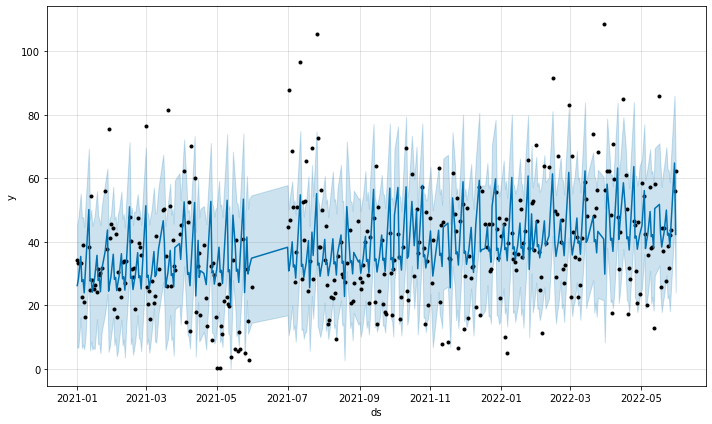

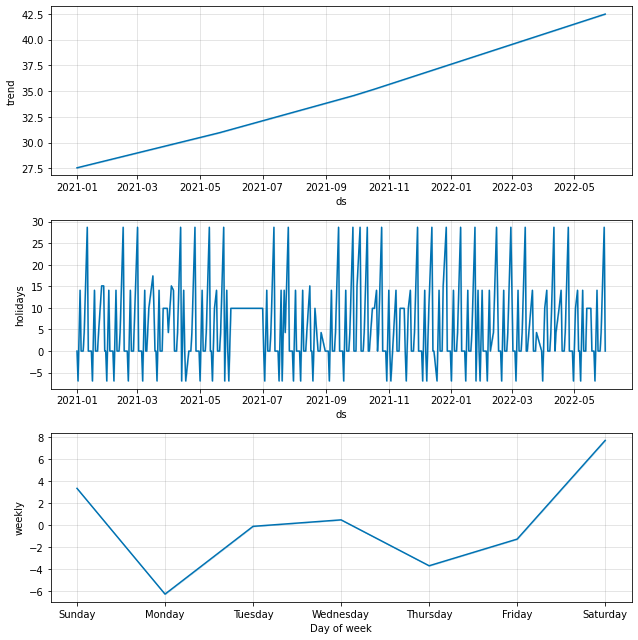

In [174]:
forecast(df5_dr_tr)

In [175]:
br5_r = details(df5_dr_tr)
br5_r

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,18.79157,1.427377,37.631866,8.569853,20.368093,64.826729


### Branch 6:

In [77]:
holiday(df6_d)

,holiday,ds,lower_window,upper_window
0,hol_wk_sat1,2021-01-02,0,1
1,hol_wk_mon1,2021-01-04,-1,0
2,hol_wk_fri2,2021-01-08,0,2
3,hol_wk_mon2,2021-01-11,-2,0
4,hol_wk_sat1,2021-01-16,0,1
...,...,...,...,...
167,hol_wk_mon2,2022-06-13,-2,0
168,hol_wk_sat1,2022-06-18,0,1
169,hol_wk_mon1,2022-06-20,-1,0
170,hol_wk_fri2,2022-06-24,0,2


#### Receipt:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,5.493516,0.637084,11.166150,5.493516,5.493516,0.380379,0.380379,0.380379,0.00000,...,0.0,0.0,0.0,0.380379,0.380379,0.380379,0.0,0.0,0.0,5.873895
1,2021-01-02,5.498192,-0.816146,9.565495,5.498192,5.498192,-1.128903,-1.128903,-1.128903,0.00000,...,0.0,0.0,0.0,-1.205248,-1.205248,-1.205248,0.0,0.0,0.0,4.369289
2,2021-01-04,5.507544,0.774518,11.488894,5.507544,5.507544,0.430119,0.430119,0.430119,0.00000,...,0.0,0.0,0.0,0.209392,0.209392,0.209392,0.0,0.0,0.0,5.937663
3,2021-01-05,5.512220,0.783240,11.268751,5.512220,5.512220,0.739999,0.739999,0.739999,0.00000,...,0.0,0.0,0.0,0.739999,0.739999,0.739999,0.0,0.0,0.0,6.252219
4,2021-01-06,5.516896,0.400808,10.833683,5.516896,5.516896,0.195412,0.195412,0.195412,0.00000,...,0.0,0.0,0.0,0.195412,0.195412,0.195412,0.0,0.0,0.0,5.712308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022-05-25,6.456618,1.389839,11.778874,6.456618,6.456618,0.195412,0.195412,0.195412,0.00000,...,0.0,0.0,0.0,0.195412,0.195412,0.195412,0.0,0.0,0.0,6.652030
353,2022-05-26,6.456736,1.327905,12.270182,6.456736,6.456736,0.082926,0.082926,0.082926,0.00000,...,0.0,0.0,0.0,0.082926,0.082926,0.082926,0.0,0.0,0.0,6.539662
354,2022-05-27,6.456853,1.419609,12.608984,6.456853,6.456853,0.477390,0.477390,0.477390,0.09701,...,0.0,0.0,0.0,0.380379,0.380379,0.380379,0.0,0.0,0.0,6.934243
355,2022-05-30,6.457207,2.535774,13.013128,6.457207,6.457207,1.397961,1.397961,1.397961,0.00000,...,0.0,0.0,0.0,0.209392,0.209392,0.209392,0.0,0.0,0.0,7.855168


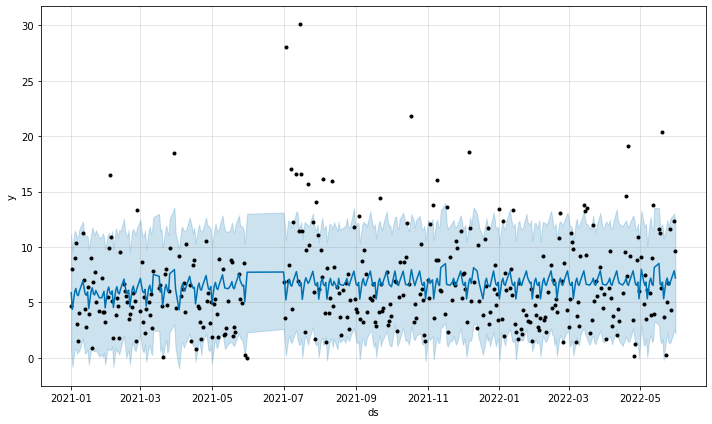

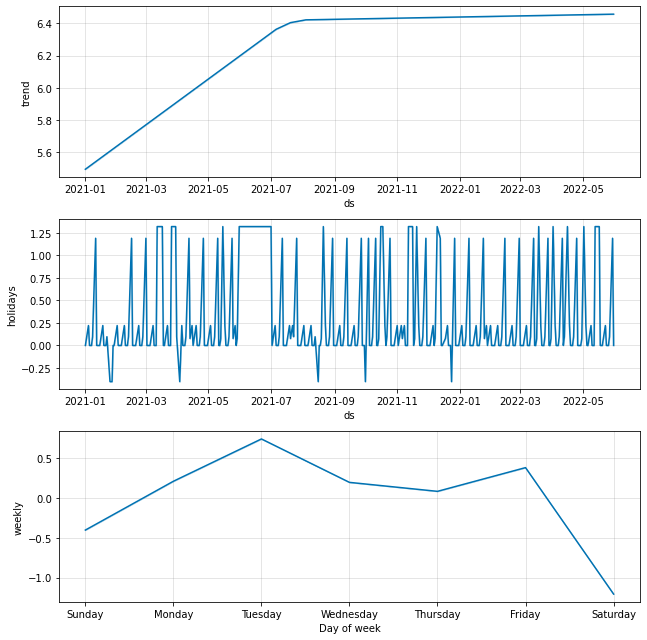

In [183]:
forecast(df6_dr_tr)

In [186]:
br6_r = details(df6_dr_tr)
br6_r

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

INFO:prophet:Skipping MAPE because y close to 0


,rmse,avg,stdev,min,max
0,4.909428,6.604781,0.734405,4.258796,8.620383


#### Pay:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hol_wk_fri2,...,national,national_lower,national_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,15.978360,5.473877,26.538814,15.978360,15.978360,0.149310,0.149310,0.149310,0.000000,...,0.0,0.0,0.0,0.149310,0.149310,0.149310,0.0,0.0,0.0,16.127670
1,2021-01-02,15.988240,1.443238,22.794638,15.988240,15.988240,-3.936009,-3.936009,-3.936009,0.000000,...,0.0,0.0,0.0,-0.189301,-0.189301,-0.189301,0.0,0.0,0.0,12.052231
2,2021-01-04,16.007999,9.050977,29.970708,16.007999,16.007999,4.093417,4.093417,4.093417,0.000000,...,0.0,0.0,0.0,1.143688,1.143688,1.143688,0.0,0.0,0.0,20.101416
3,2021-01-05,16.017878,8.010273,28.844426,16.017878,16.017878,1.959614,1.959614,1.959614,0.000000,...,0.0,0.0,0.0,1.959614,1.959614,1.959614,0.0,0.0,0.0,17.977492
4,2021-01-06,16.027758,4.608345,26.159602,16.027758,16.027758,-0.623361,-0.623361,-0.623361,0.000000,...,0.0,0.0,0.0,-0.623361,-0.623361,-0.623361,0.0,0.0,0.0,15.404397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022-05-25,16.708762,5.529861,27.307756,16.708762,16.708762,-0.623361,-0.623361,-0.623361,0.000000,...,0.0,0.0,0.0,-0.623361,-0.623361,-0.623361,0.0,0.0,0.0,16.085402
353,2022-05-26,16.703466,6.155995,28.971004,16.703466,16.703466,1.172216,1.172216,1.172216,0.000000,...,0.0,0.0,0.0,1.172216,1.172216,1.172216,0.0,0.0,0.0,17.875682
354,2022-05-27,16.698170,8.611123,30.373202,16.698170,16.698170,3.409691,3.409691,3.409691,3.260381,...,0.0,0.0,0.0,0.149310,0.149310,0.149310,0.0,0.0,0.0,20.107861
355,2022-05-30,16.682281,11.127595,31.522365,16.682281,16.682281,5.192940,5.192940,5.192940,0.000000,...,0.0,0.0,0.0,1.143688,1.143688,1.143688,0.0,0.0,0.0,21.875222


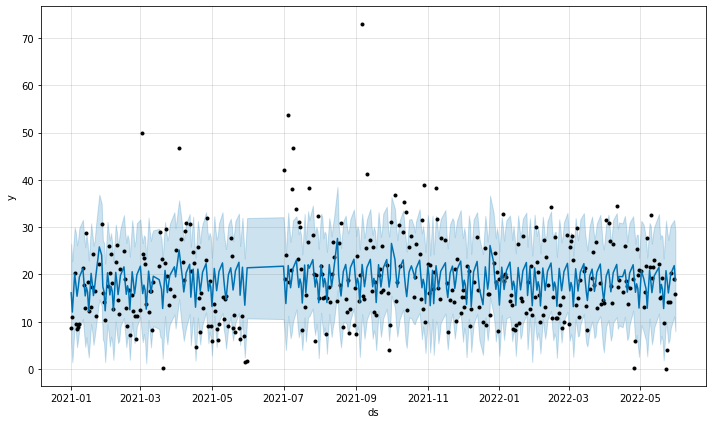

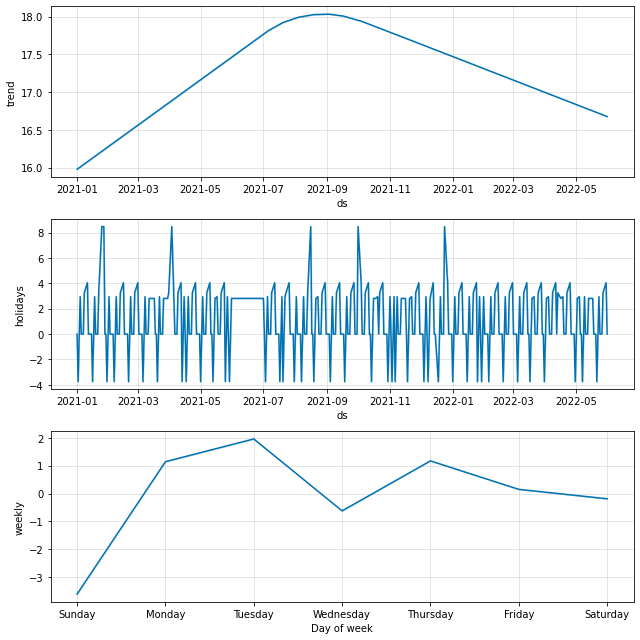

In [179]:
forecast(df6_dp_tr)

In [180]:
br6_p = details(df6_dp_tr)
br6_p

INFO:prophet:Making 26 forecasts with cutoffs between 2021-04-07 12:00:00 and 2022-04-30 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,rmse,mape,avg,stdev,min,max
0,9.923397,1.294667,18.709082,2.714297,12.050591,27.731647


In [191]:
print(br1_p)
print(br2_p)

        rmse     mape        avg     stdev        min        max
0  13.437998  0.73365  16.961764  2.623119  11.336299  24.782959
        rmse      mape        avg     stdev        min       max
0  26.326979  0.681055  36.776613  5.170344  22.531841  53.31358


In [210]:
br_p = pd.concat([br1_p, br2_p, br3_p, br4_p, br5_p, br6_p])
br_r = pd.concat([br1_r, br2_r, br3_r, br4_r, br5_r, br6_r])
br_p.index = ['Br1', 'Br2', 'Br3', 'Br4', 'Br5', 'Br6']
br_r.index = ['Br1', 'Br2', 'Br3', 'Br4', 'Br5', 'Br6']

In [215]:
br_p

,rmse,mape,avg,stdev,min,max
Br1,13.437998,0.733650,16.961764,2.623119,11.336299,24.782959
Br2,26.326979,0.681055,36.776613,5.170344,22.531841,53.313580
Br3,17.437551,1.622904,37.043714,4.825155,26.917197,50.209786
Br4,37.267771,NaN,62.240342,7.815070,43.570209,79.584118
Br5,19.464216,0.652699,37.482401,6.501007,24.643497,53.436171
Br6,9.923397,1.294667,18.709082,2.714297,12.050591,27.731647


In [216]:
br_r

,rmse,mape,avg,stdev,min,max
Br1,27.383273,0.517635,39.074117,12.939488,20.238088,80.697465
Br2,35.286673,0.421286,62.701362,16.561016,35.365849,115.539101
Br3,20.850372,0.262106,55.302747,14.099429,37.309162,95.586419
Br4,34.529950,0.540350,54.997560,10.659444,39.738205,89.075688
Br5,18.791570,1.427377,37.631866,8.569853,20.368093,64.826729
Br6,4.909428,NaN,6.604781,0.734405,4.258796,8.620383
